In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

# Data Import

### Homogenous Cement Data

In [5]:
# Orientation one
dfo1hrun1 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun2 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun3 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun4 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

# Orientation two
dfo2hrun1 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun2 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun3 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo2hrun4 = pd.read_csv('../Data/Cement_sample/O2/O2_long/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

In [6]:
dfO1h = pd.concat([dfo1hrun1['Delays'], dfo1hrun1['Time-delay1'], dfo1hrun2['Time-delay2'], dfo1hrun3['Time-delay3'], 
                  dfo1hrun4['Time-delay4']], axis=1)
dfO1h = dfO1h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO1h['mean'] = dfO1h.iloc[:, 1:].mean(axis=1)
dfO1h['std'] = dfO1h.iloc[:, 1:].std(axis=1)

dfO2h = pd.concat([dfo2hrun1['Delays'], dfo2hrun1['Time-delay1'], dfo2hrun2['Time-delay2'], dfo2hrun3['Time-delay3'], 
                  dfo2hrun4['Time-delay4']], axis=1)
dfO2h = dfO2h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO2h['mean'] = dfO2h.iloc[:, 1:].mean(axis=1)
dfO2h['std'] = dfO2h.iloc[:, 1:].std(axis=1)

### Thick Sand Cement Data

In [7]:
# Orientation one
dfo1run1_thick = pd.read_csv('../Data/Cement_sample_wt_sand/sample2/O1/delays-from-all-runs/Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run2_thick = pd.read_csv('../Data/Cement_sample_wt_sand/sample2/O1/delays-from-all-runs/Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run3_thick = pd.read_csv('../Data/Cement_sample_wt_sand/sample2/O1/delays-from-all-runs/Run3.txt', delimiter=' '
                       , dtype= np.float64)
# Orientation two
dfo2run1_thick = pd.read_csv('../Data/Cement_sample_wt_sand/sample2/O2/delays-from-all-runs/Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run2_thick = pd.read_csv('../Data/Cement_sample_wt_sand/sample2/O2/delays-from-all-runs/Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run3_thick = pd.read_csv('../Data/Cement_sample_wt_sand/sample2/O2/delays-from-all-runs/Run3.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run4_thick = pd.read_csv('../Data/Cement_sample_wt_sand/sample2/O2/delays-from-all-runs/Run4.txt', delimiter=' '
                       , dtype= np.float64)

In [8]:
dfO1_thick = pd.concat([dfo1run1_thick['Delays'], dfo1run1_thick['Time-delay1'],
                        dfo1run2_thick['Time-delay2'], dfo1run3_thick['Time-delay3']], axis=1)
dfO1_thick = dfO1_thick.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3"}, errors="raise")
dfO1_thick['mean'] = dfO1_thick.iloc[:, 1:].mean(axis=1)
dfO1_thick['std'] = dfO1_thick.iloc[:, 1:].std(axis=1)

dfO2_thick = pd.concat([dfo2run1_thick['Delays'], dfo2run1_thick['Time-delay1'], 
                        dfo2run2_thick['Time-delay2'], dfo2run3_thick['Time-delay3'], dfo2run4_thick['Time-delay4']], axis=1)
dfO2_thick = dfO2_thick.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3",
                                        "Time-delay3": "Run3"}, errors="raise")
dfO2_thick['mean'] = dfO2_thick.iloc[:, 1:].mean(axis=1)
dfO2_thick['std'] = dfO2_thick.iloc[:, 1:].std(axis=1)

### Thin Sand 1 Cement Data

In [9]:
# Orientation one
dfo1run1_thin1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run1.txt',
                             delimiter=' ', dtype= np.float64)
dfo1run2_thin1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run2.txt',
                             delimiter=' ', dtype= np.float64)
dfo1run3_thin1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O1/delays-from-all-runs/Cement_sand_O1_Run3.txt', 
                             delimiter=' ', dtype= np.float64)
# Orientation two
dfo2run1_thin1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run1.txt',
                             delimiter=' ', dtype= np.float64)
dfo2run2_thin1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run2.txt',
                             delimiter=' ', dtype= np.float64)
dfo2run3_thin1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run3.txt',
                             delimiter=' ', dtype= np.float64)
dfo2run4_thin1 = pd.read_csv('../Data/Cement_sample_wt_sand/sample3/O2/delays-from-all-runs/Cement_sample_O2_Run4.txt',
                             delimiter=' ', dtype= np.float64)

In [10]:
dfO1_thin1 = pd.concat([dfo1run1_thin1['Delays'], dfo1run1_thin1['Time-delay1'], dfo1run2_thin1['Time-delay2'],
                        dfo1run3_thin1['Time-delay3']], axis=1)
dfO1_thin1 = dfO1_thin1.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3"}, errors="raise")
dfO1_thin1['mean'] = dfO1_thin1.iloc[:, 1:].mean(axis=1)
dfO1_thin1['std'] = dfO1_thin1.iloc[:, 1:].std(axis=1)

dfO2_thin1 = pd.concat([dfo2run1_thin1['Delays'], dfo2run1_thin1['Time-delay1'], dfo2run2_thin1['Time-delay2'],
                        dfo2run3_thin1['Time-delay3'], dfo2run4_thin1['Time-delay4']], axis=1)
dfO2_thin1 = dfO2_thin1.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                     "Time-delay4": "Run4"}, errors="raise")
dfO2_thin1['mean'] = dfO2_thin1.iloc[:, 1:].mean(axis=1)
dfO2_thin1['std'] = dfO2_thin1.iloc[:, 1:].std(axis=1)

### Thin Sand 2 Cement Data

In [14]:
fileroot = '../Data/Cement_sample_wt_sand/sample4/'

In [15]:
# Orientation one
dfo1run1_thin2 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run2_thin2 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run3_thin2 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run3.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run4_thin2 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run4.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run5_thin2 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run5.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run6_thin2 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run6.txt', delimiter=' '
                       , dtype= np.float64)
# Orientation two
dfo2run1_thin2 = pd.read_csv(fileroot+'O2/delays-from-all-runs/Cement_sand_O2_Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run2_thin2 = pd.read_csv(fileroot+'O2/delays-from-all-runs/Cement_sand_O2_Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run3_thin2 = pd.read_csv(fileroot+'O2/delays-from-all-runs/Cement_sand_O2_Run3.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run4_thin2 = pd.read_csv(fileroot+'O2/delays-from-all-runs/Cement_sand_O2_Run4.txt', delimiter=' '
                       , dtype= np.float64)

In [16]:
dfO1_thin2 = pd.concat([dfo1run1_thin2['Delays'], dfo1run1_thin2['Time-delay1'], dfo1run2_thin2['Time-delay2'],
                        dfo1run3_thin2['Time-delay3'], dfo1run4_thin2['Time-delay4']], axis=1)
dfO1_thin2 = dfO1_thin2.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")
dfO1_thin2 = pd.concat([dfO1_thin2, dfo1run5_thin2['Time-delay1'], dfo1run6_thin2['Time-delay2']], axis=1)
dfO1_thin2 = dfO1_thin2.rename(columns={"Time-delay1": "Run5", "Time-delay2": "Run6"}, errors="raise")
dfO1_thin2['mean'] = dfO1_thin2.iloc[:, 2:].mean(axis=1)
dfO1_thin2['std'] = dfO1_thin2.iloc[:, 2:].std(axis=1)

dfO2_thin2 = pd.concat([dfo2run1_thin2['Delays'], dfo2run1_thin2['Time-delay1'], dfo2run2_thin2['Time-delay2'],
                        dfo2run3_thin2['Time-delay3'], dfo2run4_thin2['Time-delay4']], axis=1)
dfO2_thin2 = dfO2_thin2.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                     "Time-delay4": "Run4"}, errors="raise")
dfO2_thin2['mean'] = dfO2_thin2.iloc[:, 1:].mean(axis=1)
dfO2_thin2['std'] = dfO2_thin2.iloc[:, 1:].std(axis=1)

# Comparison: individual plotting

In [18]:
labels = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5']

# Comparison: joint plotting

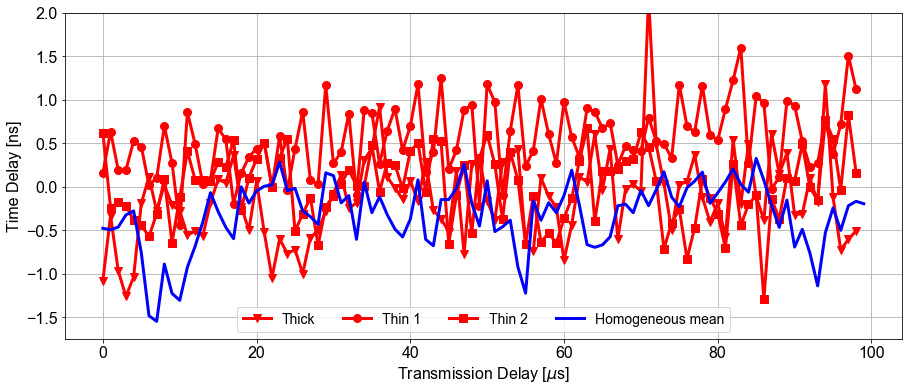

In [34]:
plt.figure(figsize=(15,6))
plt.plot(dfO1_thick['Delays'][:99], dfO1_thick['mean'][:99], '-vr', markersize=8, label = 'Thick', linewidth = 3)
# plt.fill_between(dfO1_50.index, dfO1_50['mean'] - 2*dfO1_50['std'], dfO1_50['mean'] + 2*dfO1_50['std'],
#                 alpha=.25, color = 'crimson')

plt.plot(dfO1_thin1['Delays'], dfO1_thin1['mean'], '-or', markersize=8, label = 'Thin 1', linewidth = 3)
# plt.fill_between(dfO1_100.index, dfO1_100['mean'] - 2*dfO1_100['std'], dfO1_100['mean'] + 2*dfO1_100['std'],
#                 alpha=.25, color = 'r')

plt.plot(dfO1_thin2['Delays'], dfO1_thin2['mean'], '-sr', markersize=8, label = 'Thin 2', linewidth = 3)
# plt.fill_between(dfO1_100.index, dfO1_100['mean'] - 2*dfO1_100['std'], dfO1_100['mean'] + 2*dfO1_100['std'],
#                 alpha=.25, color = 'r')

plt.plot(dfO1h['Delays'], dfO1h['mean'], color = 'b', label = 'Homogeneous mean', linewidth = 3)
# plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
#                 alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-1.75, 2)
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.title('Orientation One')
plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Sand(thin)2/Sand-compO1.pdf', dpi=300, bbox_inches='tight',
           format='pdf')
plt.show()

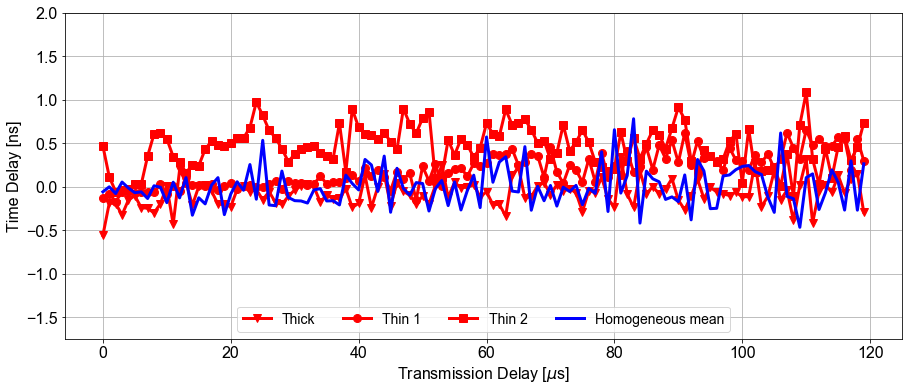

In [35]:
plt.figure(figsize=(15,6))
plt.plot(dfO2_thick['Delays'], dfO2_thick['mean'], '-vr', markersize=8, label = 'Thick', linewidth = 3)
# plt.fill_between(dfO1_50.index, dfO1_50['mean'] - 2*dfO1_50['std'], dfO1_50['mean'] + 2*dfO1_50['std'],
#                 alpha=.25, color = 'crimson')

plt.plot(dfO2_thin1['Delays'], dfO2_thin1['mean'], '-or', markersize=8, label = 'Thin 1', linewidth = 3)
# plt.fill_between(dfO1_100.index, dfO1_100['mean'] - 2*dfO1_100['std'], dfO1_100['mean'] + 2*dfO1_100['std'],
#                 alpha=.25, color = 'r')

plt.plot(dfO2_thin2['Delays'], dfO2_thin2['mean'], '-sr', markersize=8, label = 'Thin 2', linewidth = 3)
# plt.fill_between(dfO1_100.index, dfO1_100['mean'] - 2*dfO1_100['std'], dfO1_100['mean'] + 2*dfO1_100['std'],
#                 alpha=.25, color = 'r')

plt.plot(dfO2h['Delays'], dfO2h['mean'], color = 'b', label = 'Homogeneous mean', linewidth = 3)
# plt.fill_between(dfO1h.index, dfO1h['mean'] - 2*dfO1h['std'], dfO1h['mean'] + 2*dfO1h['std'],
#                 alpha=.25, color = 'b')

plt.grid()
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
plt.ylim(-1.75, 2)
plt.legend(loc='lower center', fontsize=14, ncol = 4)
# plt.title('Orientation One')
plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Sand(thin)2/Sand-compO2.pdf', dpi=300, bbox_inches='tight',
           format='pdf')
plt.show()